semi-major axis, a= [0.09756765 0.09756888 0.09757011 0.09757134 0.09757257 0.0975738
 0.09757503 0.09757626 0.09757749 0.09757872 0.09759102 0.09760333
 0.09761563 0.09762794 0.09764025 0.09765257 0.09766488 0.0976772
 0.09768952 0.09781282 0.09793634 0.09806007 0.09818401 0.09830816
 0.09843247 0.09855703 0.09868185 0.09880683 0.10006838 0.10135151
 0.10265645 0.10398362 0.10533337 0.10670611 0.10952205 0.11096599
 0.11243452 0.113928   0.11544684 0.11699146 0.1185623  0.12015981
 0.12178438 0.1234365  0.1251166  0.12682515 0.12856261 0.13032948
 0.13212622 0.13395332 0.1358113  0.13770064 0.13962189 0.14157556
 0.14356219 0.14558231 0.14763647 0.14972524 0.15184914 0.15400882
 0.15620483 0.15843778 0.16070824 0.16301691 0.16536438 0.16775117]


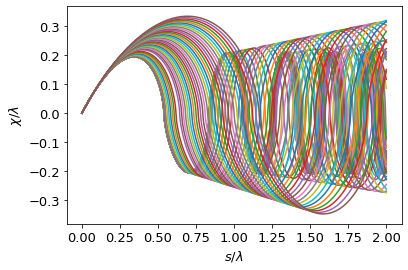

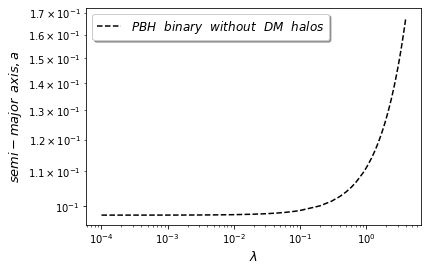

In [20]:
# For PBH binaries without dark matter halos and decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".

import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity






λ_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,
        0.4,0.5,0.6,0.7,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,
        2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0]


def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   


a_list=np.zeros(len(λ_list))


def a(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.xticks(fontsize=13) 
    plt.yticks(fontsize=13)
    plt.plot(As,Bs,'')
    plt.xlabel('$s/λ$',fontsize=13)
    plt.ylabel('$χ/λ$',fontsize=13)
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        if Δ<0:
            a=A/2
            break
        
    return a
    
for k, λ_0 in enumerate(λ_list):
    a_list[k] = a(λ_0)
print("semi-major axis, a=",a_list)

plt.figure(figsize=(6,4))    
plt.loglog(λ_list,a_list,'k--')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.show()   

semi-major axis, a= [0.09756704 0.09756767 0.09756829 0.09756892 0.09756954 0.09757017
 0.0975708  0.09757142 0.09757205 0.09757267 0.09757892 0.09758518
 0.09759143 0.09759768 0.09760393 0.09761019 0.09761644 0.09762269
 0.09762894 0.09769143 0.09775388 0.09781629 0.09787868 0.09794103
 0.09800336 0.09806565 0.09812791 0.09819013 0.09881054 0.09942774
 0.1000417  0.10065244 0.10125994 0.10186424 0.10306331 0.10365812
 0.10424981 0.10483839 0.10542394 0.10600643 0.10658589 0.10716236
 0.10773586 0.10830642 0.10887407 0.10943883 0.11000073 0.11055979
 0.11111605 0.11166953 0.11222029 0.11276828 0.11331357 0.11385617
 0.11439615 0.1149335  0.11546828 0.11600049 0.11653014 0.1170573
 0.11758198 0.1181042  0.11862398 0.11914145 0.11965644 0.12016906]


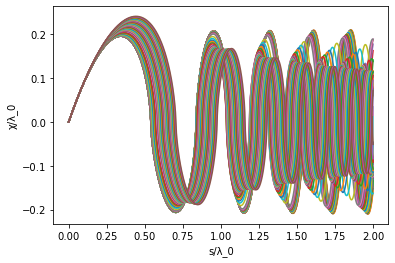

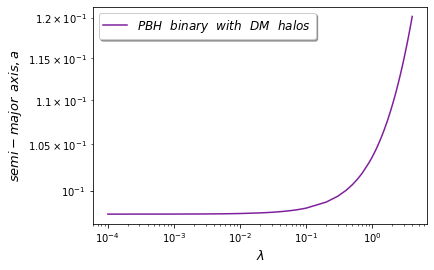

In [21]:
# For PBH binaries with dark matter halos and decoupling around matter-radiation equality.


# Solution of eq.(6) for PBH binaries without DM halos given in paper "The merger rate of primordial-black-hole 
# binaries".



def M_halo(s):               #eq.(4) in reference pdf "M_DM at s_dec".
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3)))




def n_mr(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k_mr(s):
    return (1/n_mr(s))

def λ_mr(s):
    return λ_0*k_mr(s)
   


def a_(λ_0):
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_mr(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=(λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    plt.plot(As,Bs,'')
    plt.xlabel('s/λ_0')
    plt.ylabel('χ/λ_0')
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        if Δ<0:
            a=A/2
            break
        
    return a
    
a_halo_list=np.zeros(len(λ_list))
for k, λ_0 in enumerate(λ_list):
    a_halo_list[k] = a_(λ_0)
print("semi-major axis, a=",a_halo_list)      
 



plt.figure(figsize=(6,4))    
plt.loglog(λ_list,a_halo_list,'#7E1E9C')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.show() 

x= -0.1226 y= 0.0509 z= 0.2202


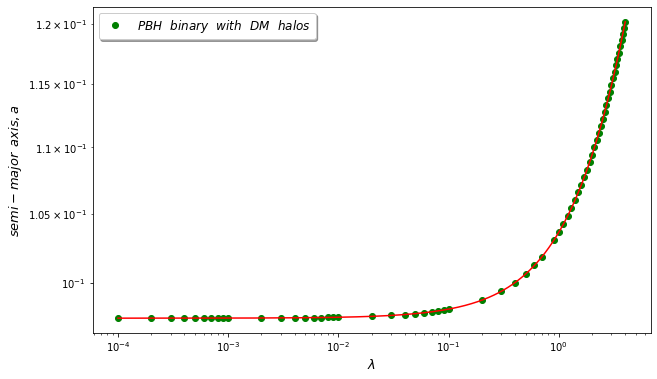

In [24]:
# Fitting of the the curve for the value of semi-major axis, a for the PBH binary with 
# dark matter halos.

plt.figure(figsize=(10,6))    
plt.loglog(λ_list,a_halo_list,'go')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$semi-major \hspace{0.5} axis,a$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        



def func(λ, x, y, z):
    return x * np.exp(-y * λ) + z 
popt, pcov = curve_fit(func, λ_list,a_halo_list)
x,y,z = popt 
print("x=",'%0.4f'%x,"y=",'%0.4f'%y,"z=",'%0.4f'%z)

step = 0.0001
fit_λs = np.arange(min(λ_list),max(λ_list),step)
plt.plot(fit_λs, func(fit_λs,x,y,z), 'r-', label='fit')
plt.show()



# This fitting gives semi-major axis, a = (x+z)-xzλ = (0.09756 + 0.06243λ) (up to the first order of λ). 
# Please let me know if this expression of semi-major axis, a is in good approximation 
# to generalize or not????????????

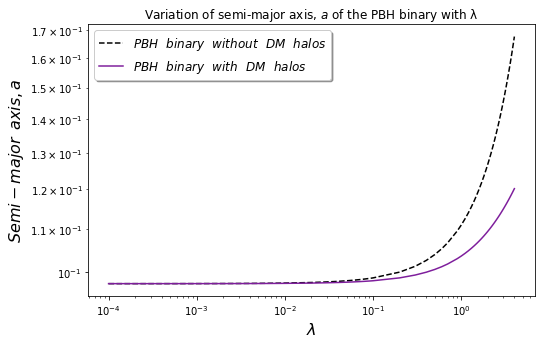

In [17]:
# Variation of  semi-major axis, a with λ for the PBH binaries with and without DM halos
# decoupling upto matter-radiation equality.

plt.figure(figsize=(8,5))
plt.loglog(λ_list,a_list,'k--')
plt.loglog(λ_list,a_halo_list,'#7E1E9C')
plt.xlabel('$λ$',fontsize=16)
plt.ylabel('$Semi-major\hspace{0.5} axis,a$',fontsize=16)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :12},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=16)        
plt.title('Variation of semi-major axis, $a$ of the PBH binary with λ')
plt.show()